In [ ]:
pip install --upgrade scikit-learn


In [ ]:
pip install -U imbalanced-learn

In [ ]:
pip install imblearn

In [ ]:
!pip install imblearn

In [ ]:
pip freeze > requirements.txt

In [ ]:
pip install -c glemaitre imbalanced-learn

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'glemaitre'


In [ ]:
pip install imblearn==0.0

In [ ]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 38.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
pip install --upgrade imbalanced-learn

In [6]:
pip install scikit-plot

In [7]:
import sklearn
print(sklearn.__version__)


1.2.2


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [10]:
BS = pd.read_csv('brain_stroke.csv')

In [11]:
BS.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [12]:
BS.shape

(4981, 11)

In [13]:
BS.duplicated().sum()

0

In [14]:
BS.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [16]:
BS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [15]:
BS.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [17]:
BS.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [18]:
data_qaultive = BS[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type',
                 'smoking_status', 'stroke']]

In [19]:
for i in data_qaultive.columns:print(data_qaultive[i].unique())

['Male' 'Female']
[0 1]
[1 0]
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[1 0]


In [20]:
for i in data_qaultive.columns:print(data_qaultive[i].value_counts())

Female    2907
Male      2074
Name: gender, dtype: int64
0    4502
1     479
Name: hypertension, dtype: int64
0    4706
1     275
Name: heart_disease, dtype: int64
Yes    3280
No     1701
Name: ever_married, dtype: int64
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64
Urban    2532
Rural    2449
Name: Residence_type, dtype: int64
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64
0    4733
1     248
Name: stroke, dtype: int64


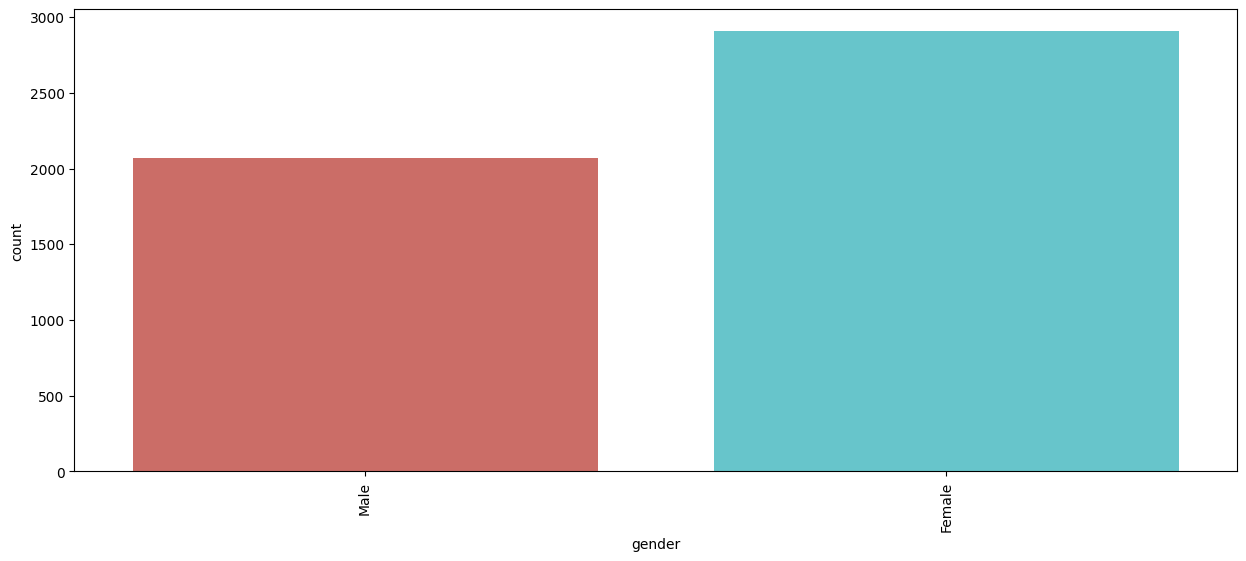

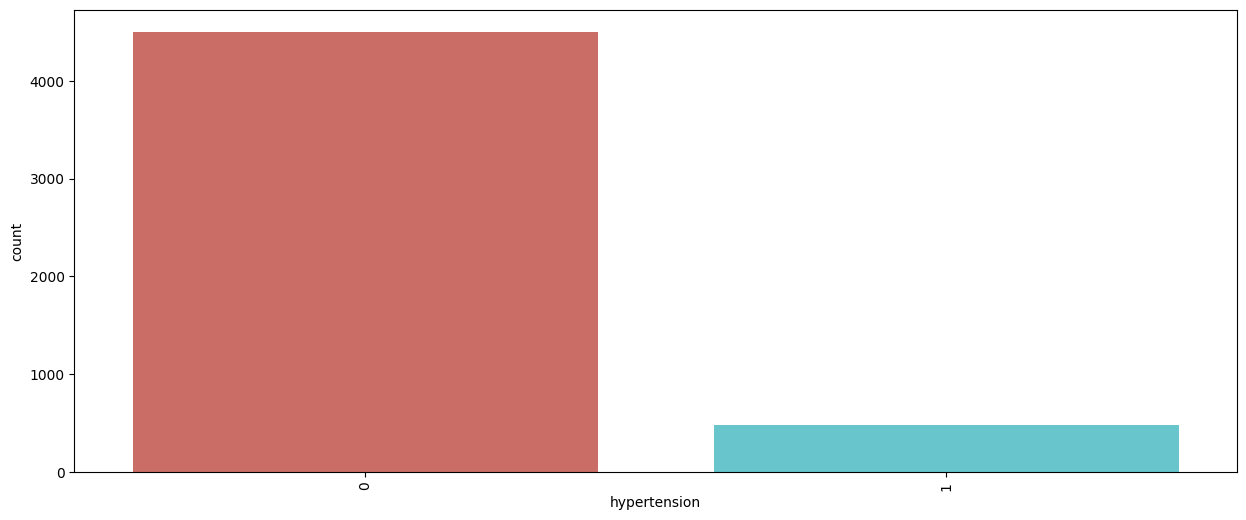

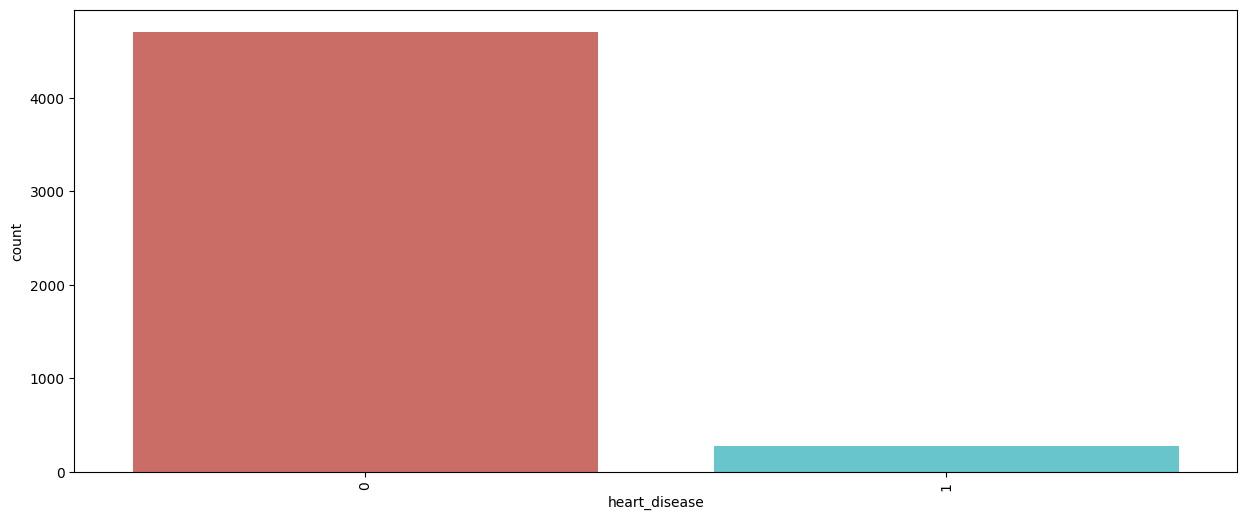

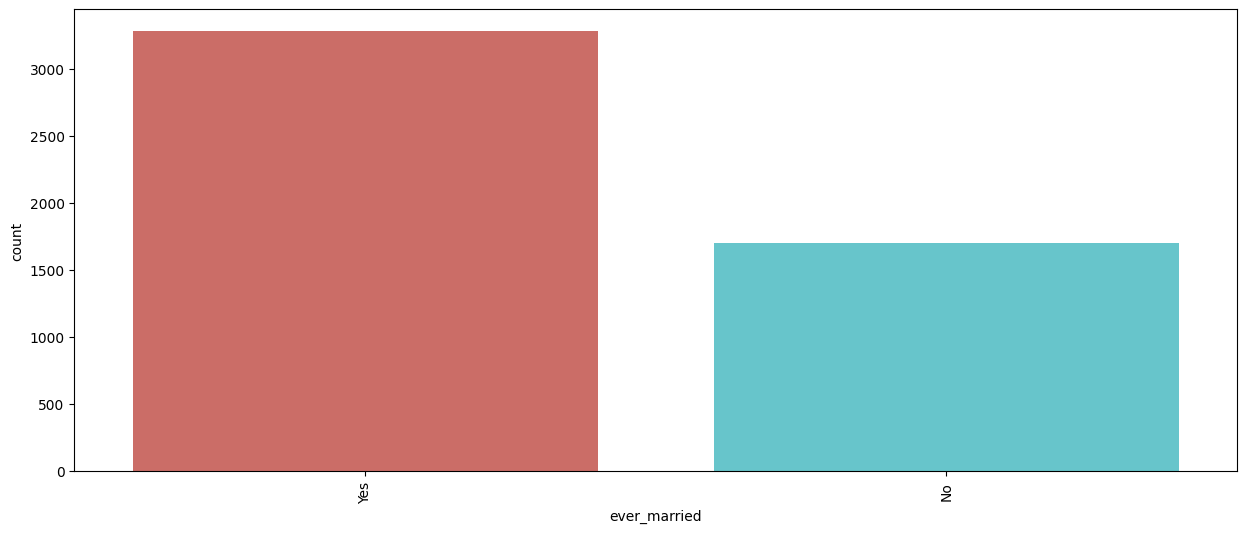

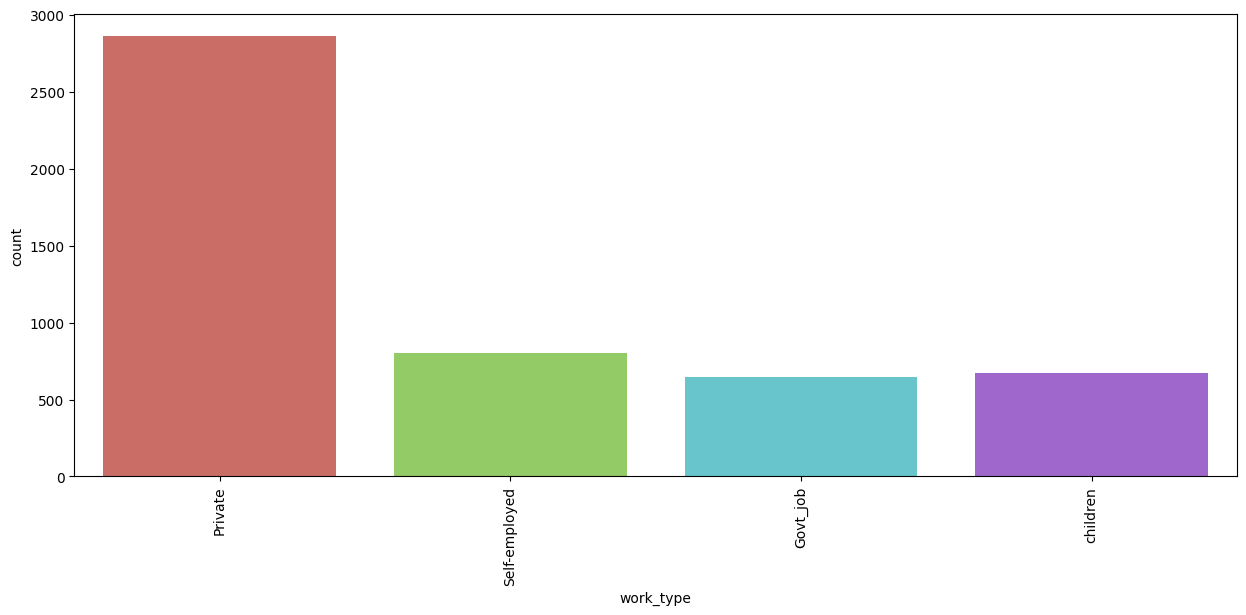

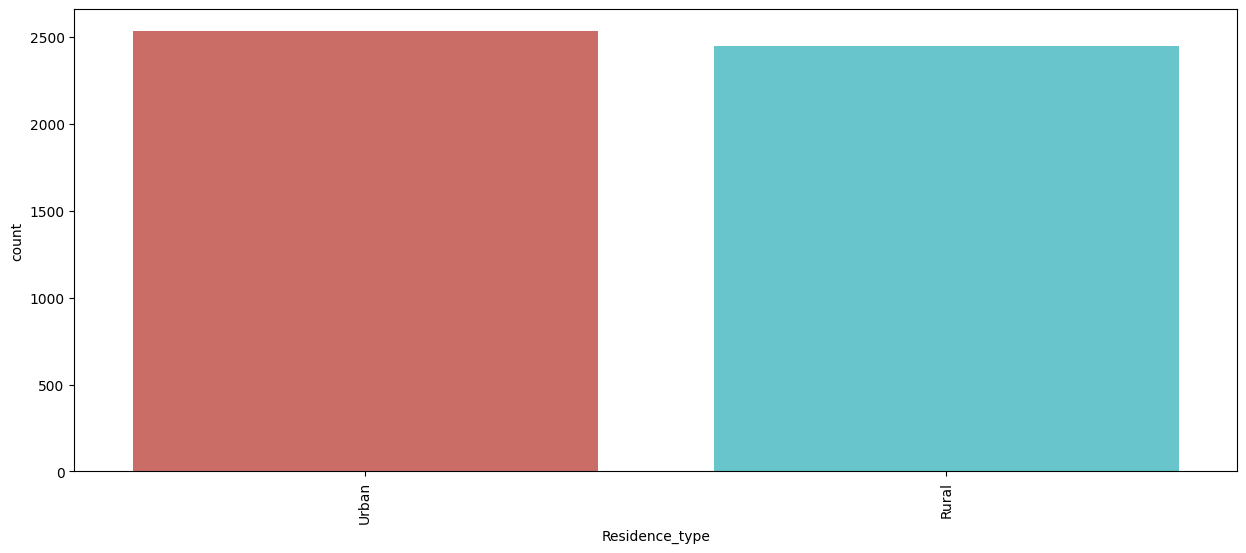

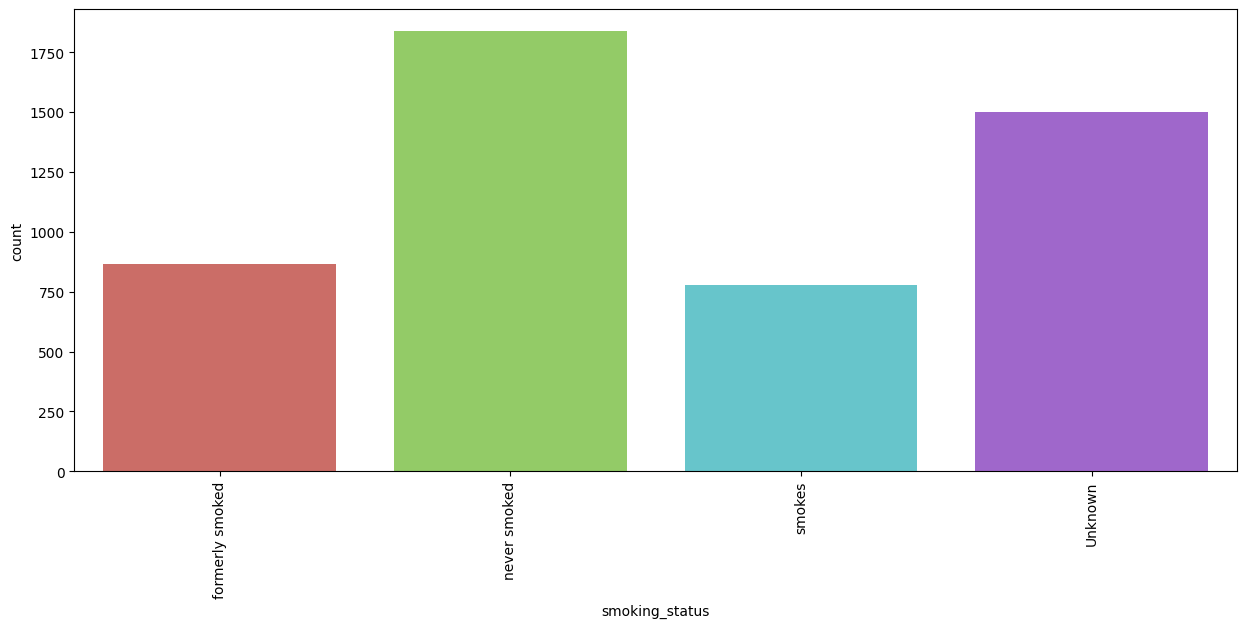

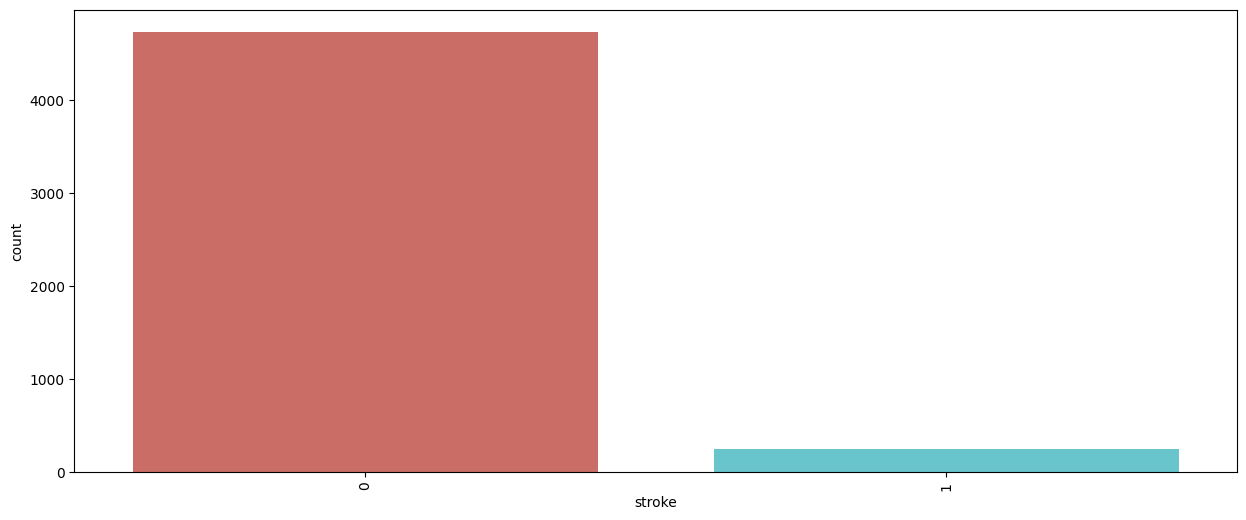

In [21]:
#data exploratory and analysis
for i in data_qaultive.columns:
    plt.figure(figsize=(15, 6))
    sns.countplot(x=i, data=data_qaultive, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

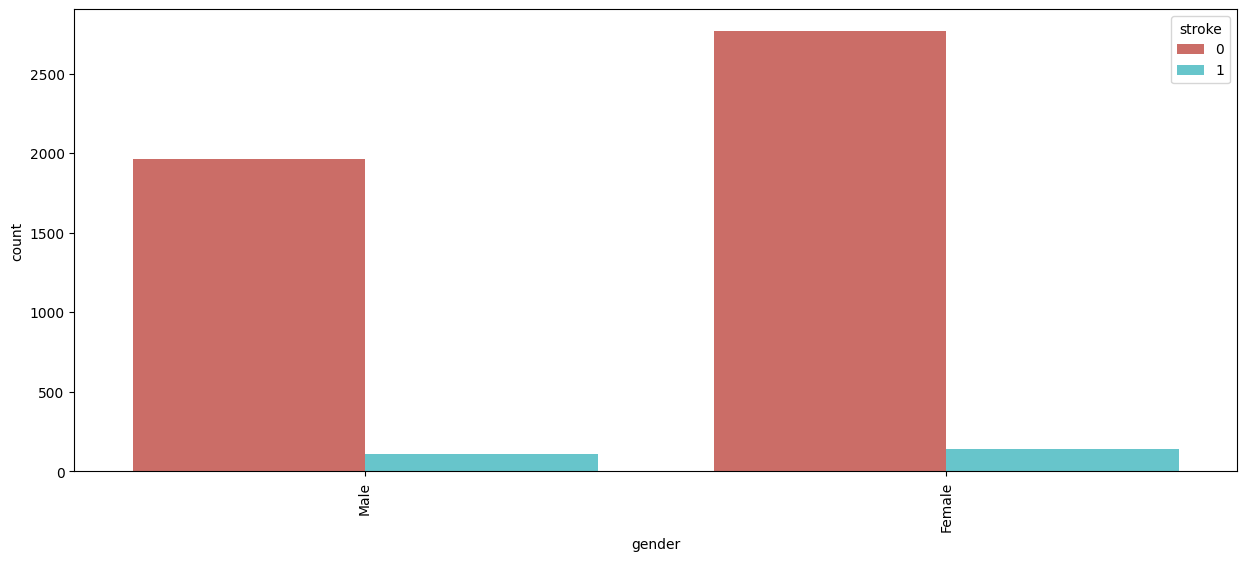

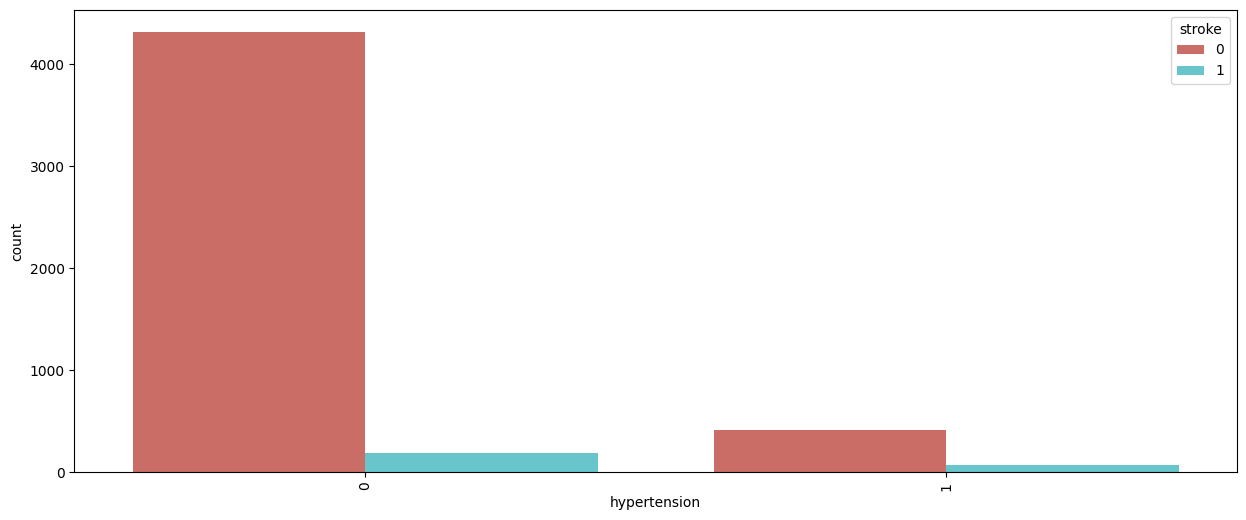

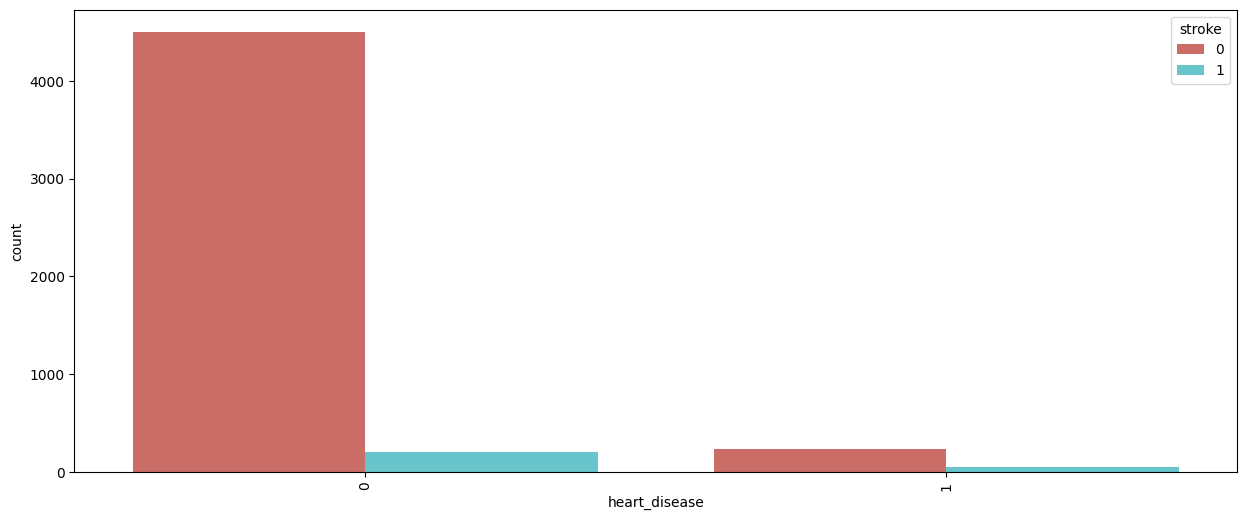

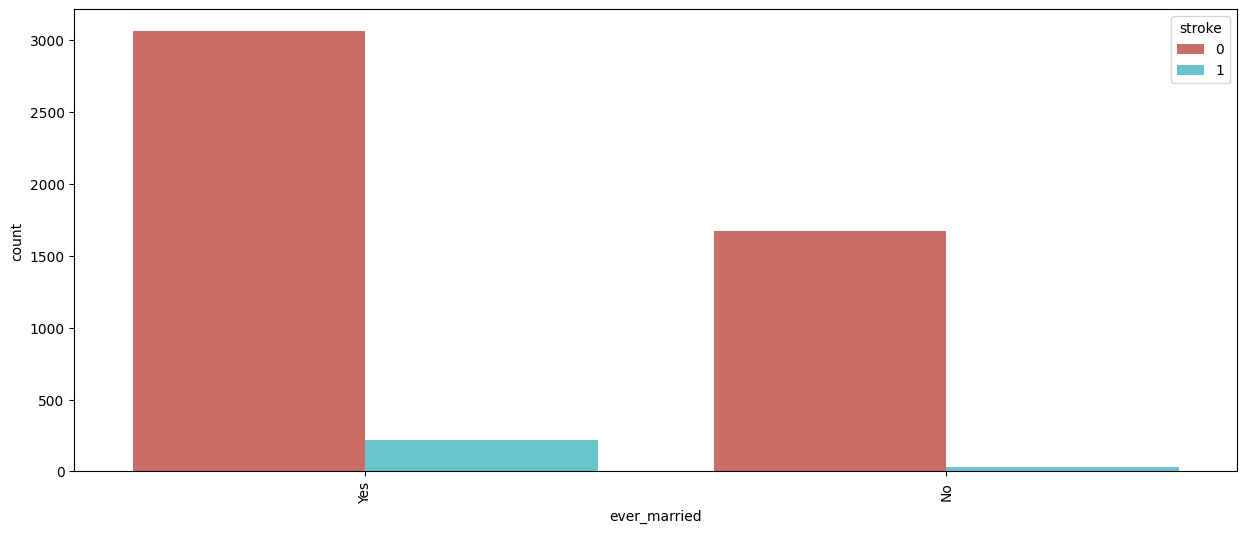

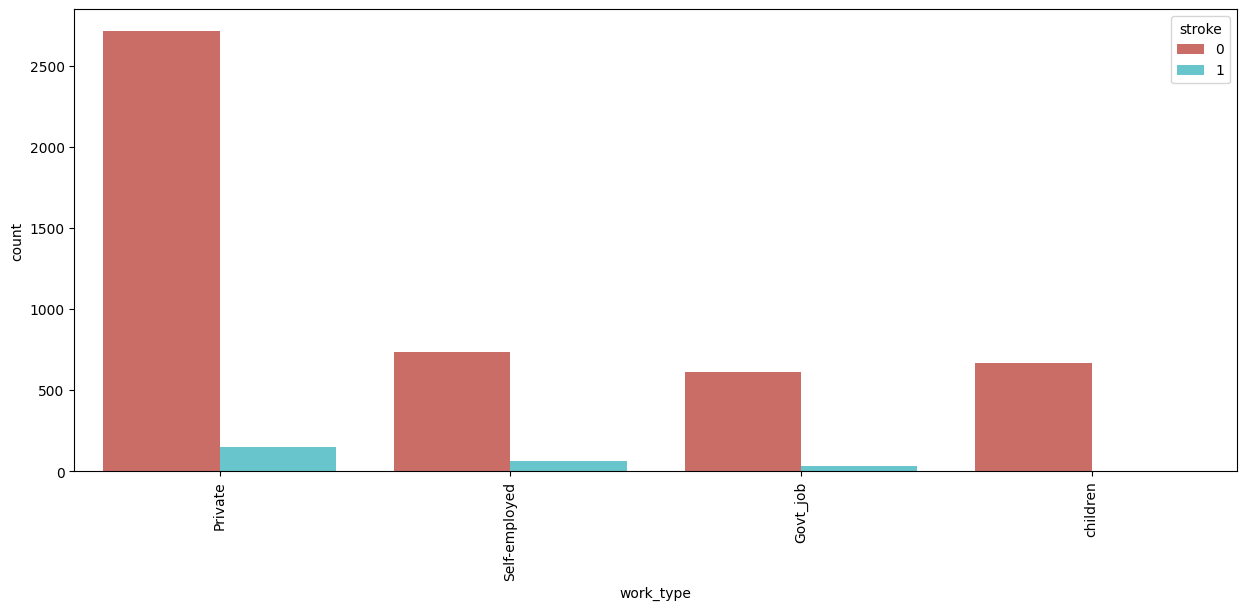

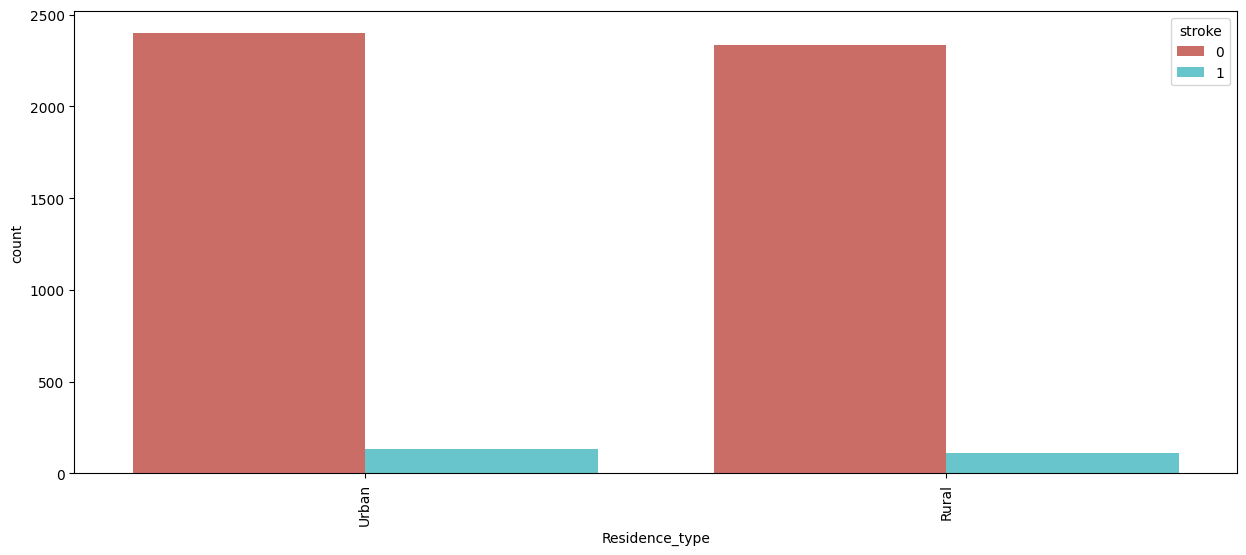

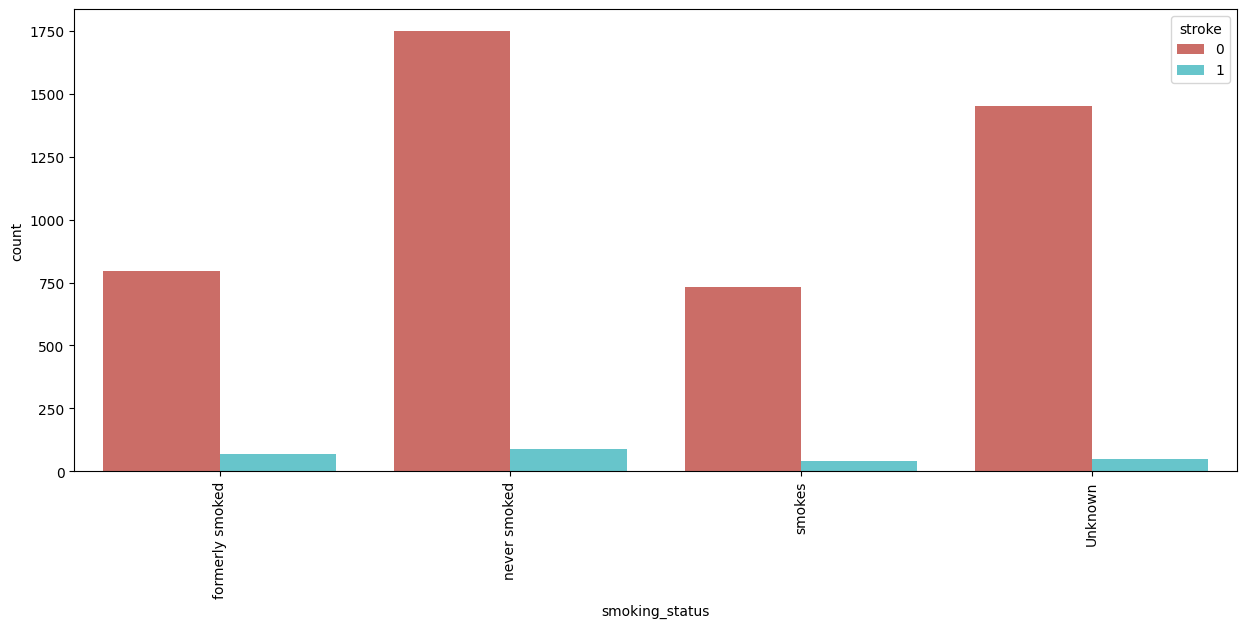

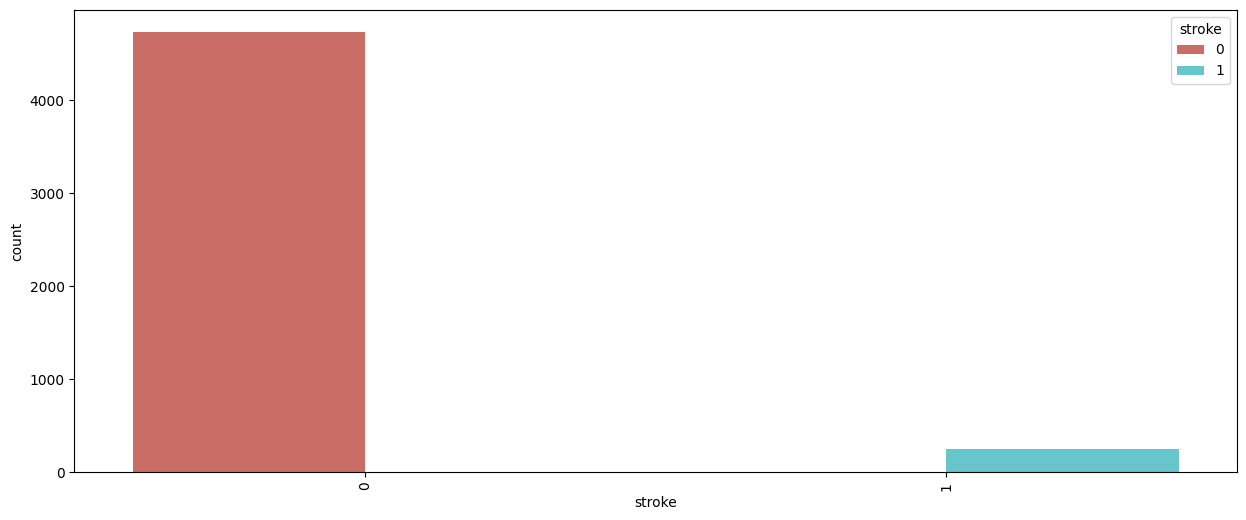

In [22]:
#for i in data_qaultive.columns:
    #plt.figure(figsize = (15,6))
    #sns.countplot(data_qaultive[i], data = data_qaultive, hue = 'stroke' , palette = 'hls')
    #plt.xticks(rotation = 90)
    #plt.show()


for i in data_qaultive.columns:
    plt.figure(figsize=(15, 6))
    sns.countplot(x=i, data=data_qaultive, hue='stroke', palette='hls')
    plt.xticks(rotation=90)
    plt.show()

In [23]:
data_quantive= BS[['age', 'avg_glucose_level', 'bmi']]

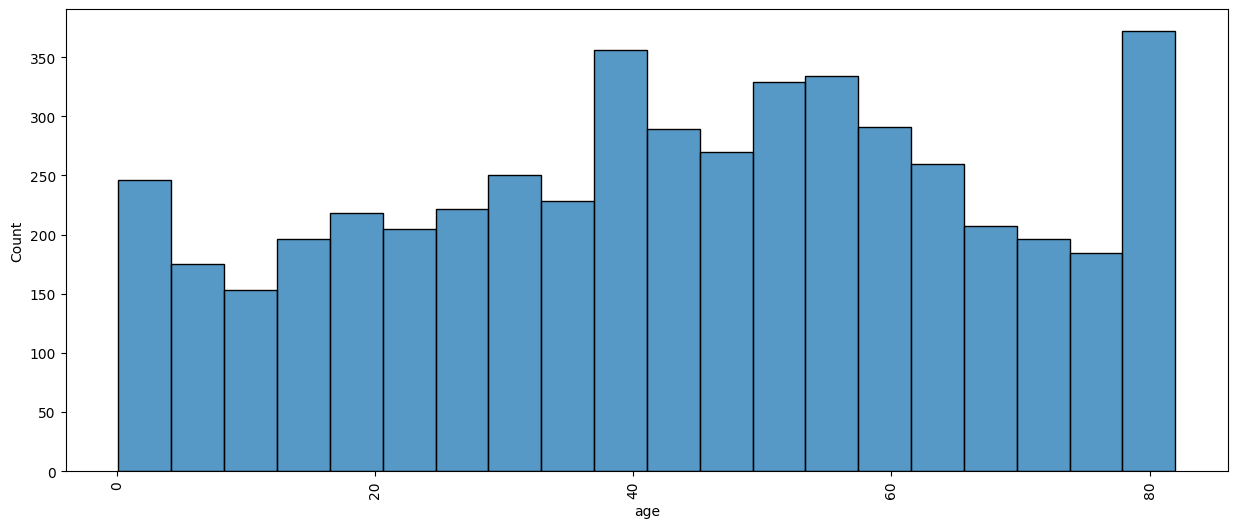

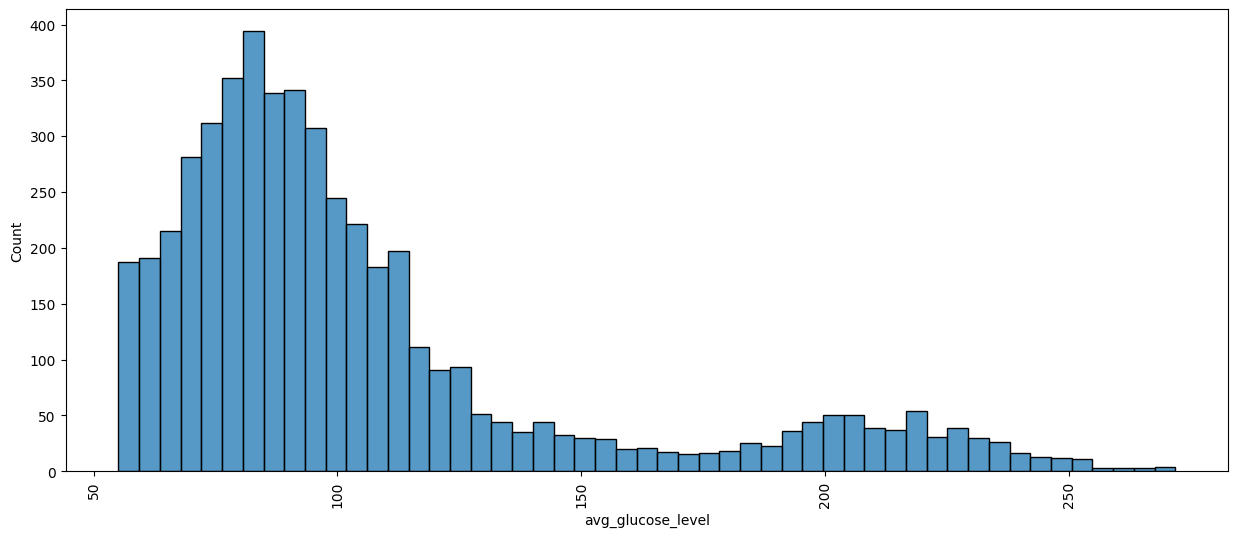

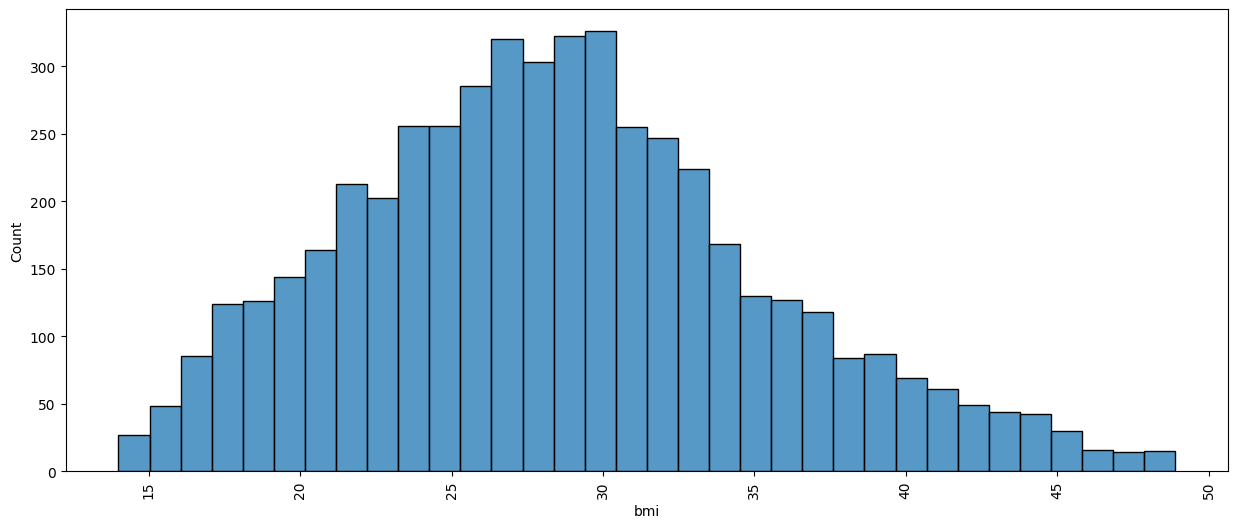

In [24]:
for i in data_quantive.columns:
    plt.figure(figsize = (15,6))
    sns.histplot(data_quantive[i], palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

In [25]:
BS['gender'] = BS['gender'].map({'Female':1,'Male':0})
BS['ever_married'] = BS['ever_married'].map({'Yes': 0, 'No': 1})
BS['work_type'] = BS['work_type'].map({'Private': 4, 'Self-employed': 1, 'Govt_job':3, 'children':0})
BS['Residence_type'] = BS['Residence_type'].map({'Urban': 1, 'Rural':0})
BS['smoking_status'] = BS['smoking_status'].map({'formerly smoked':1, 'never smoked':0, 'smokes':2 ,'Unknown':3 })

In [26]:
BS.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,4,1,228.69,36.6,1,1
1,0,80.0,0,1,0,4,0,105.92,32.5,0,1
2,1,49.0,0,0,0,4,1,171.23,34.4,2,1
3,1,79.0,1,0,0,1,0,174.12,24.0,0,1
4,0,81.0,0,0,0,4,1,186.21,29.0,1,1


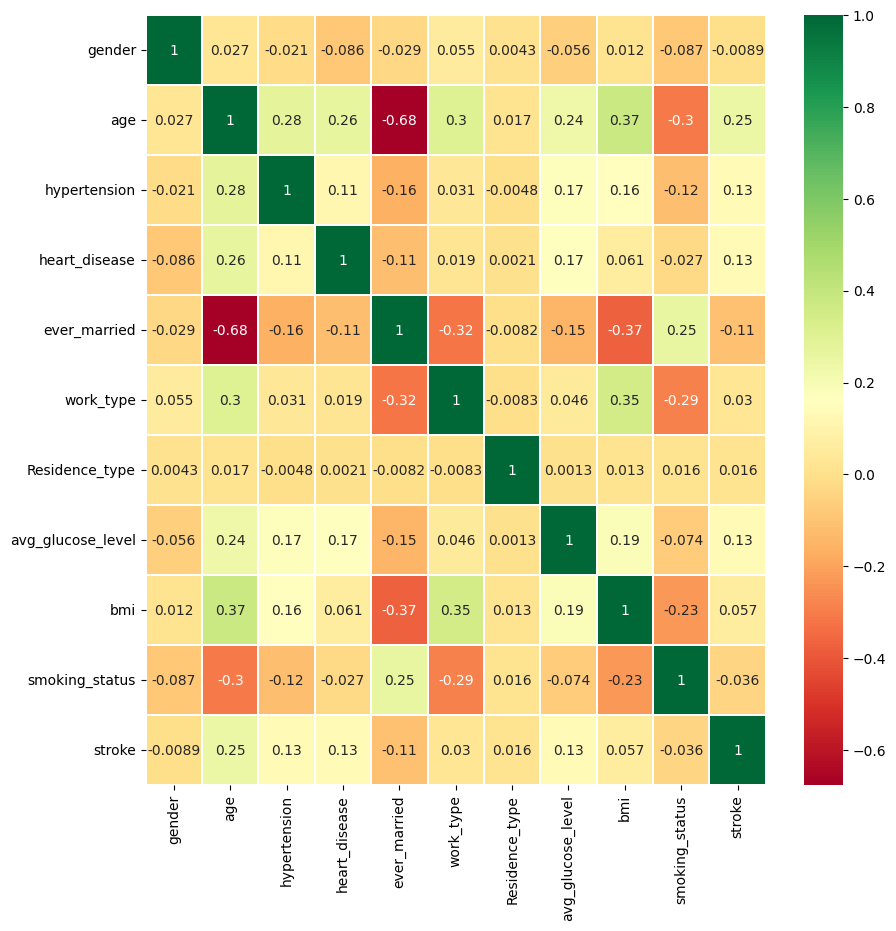

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(BS.corr(), cmap ='RdYlGn', linewidths = 0.2, annot = True)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [28]:
BS.drop(['ever_married','gender','work_type', 'Residence_type', 'smoking_status'],axis=1,inplace=True)

In [29]:
BS.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,80.0,0,1,105.92,32.5,1
2,49.0,0,0,171.23,34.4,1
3,79.0,1,0,174.12,24.0,1
4,81.0,0,0,186.21,29.0,1


In [30]:
BS['stroke'] = BS['stroke'].astype(int)

In [31]:
x = BS.drop("stroke" , axis = 1)
y = BS["stroke"]
print(x.shape, y.shape)

(4981, 5) (4981,)


In [33]:
y.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [32]:
oversample = RandomOverSampler(sampling_strategy='minority')
x_balanced, y_balanced = oversample.fit_resample(x, y)

In [34]:
y_balanced.value_counts()

1    4733
0    4733
Name: stroke, dtype: int64

In [35]:
X_train, X_test, Y_train , Y_test = train_test_split(x_balanced,y_balanced,
                                                     test_size=0.2 , random_state=42)

LR Accuracy (train): 0.7753565768621236
LR Accuracy (test): 0.781414994720169
Precision:  0.762278978388998
Recall:  0.8185654008438819
F-measure:  0.7894201424211598


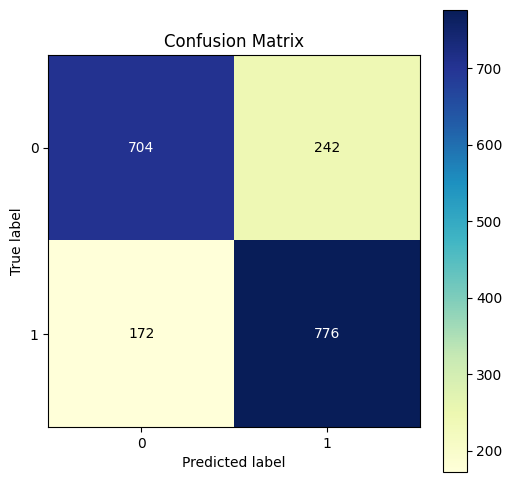

In [44]:
#Logistic Regression Model
lr = LogisticRegression() # initialize the model
lr.fit(X_train,Y_train) # fit he model
y_pred=lr.predict(X_test) # now predict
lr_train = lr.predict(X_train)
lr_acc_train = accuracy_score(Y_train, lr_train)
lr_test = lr.predict(X_test)
lr_acc_test = accuracy_score(Y_test, lr_test)
print("LR Accuracy (train):",lr_acc_train)
print("LR Accuracy (test):",lr_acc_test)
lr_perc = precision_score(Y_test, lr_test)
lr_rec = recall_score(Y_test, lr_test)
lr_f1 = f1_score(Y_test, lr_test)
print('Precision: ' ,lr_perc)
print('Recall: ', lr_rec)
print('F-measure: ', lr_f1)
skplt.metrics.plot_confusion_matrix(Y_test, lr_test,figsize=(6,6),
                                    cmap= 'YlGnBu');

DS Accuracy (train): 1.0
DS Accuracy (test): 0.9767687434002112
Precision:  0.9556451612903226
Recall:  1.0
F-measure:  0.9773195876288661


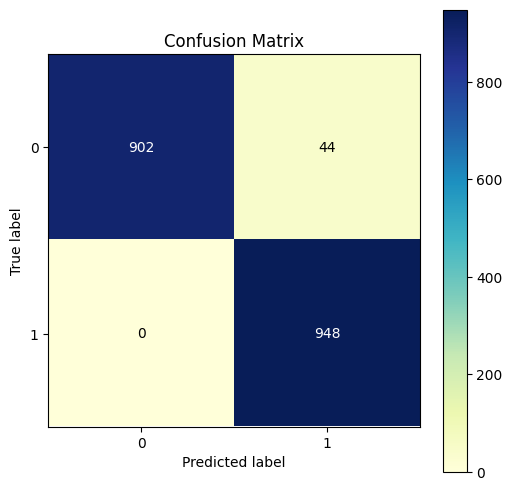

In [43]:
#Decision Tree Classifier Model
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
dt_train = dt.predict(X_train)
dt_acc_train = accuracy_score(Y_train, dt_train)

dt_test = dt.predict(X_test)
dt_acc_test = accuracy_score(Y_test, dt_test)
print("DS Accuracy (train):",dt_acc_train)
print("DS Accuracy (test):",dt_acc_test)
dt_perc = precision_score(Y_test, dt_test)
dt_rec = recall_score(Y_test, dt_test)
dt_f1 = f1_score(Y_test, dt_test)
print('Precision: ', dt_perc)
print('Recall: ',  dt_rec)
print('F-measure: ', dt_f1)
skplt.metrics.plot_confusion_matrix(Y_test, dt_test,
                                    figsize=(6,6), cmap= 'YlGnBu');

SVM Accuracy (Train): 0.7572636027469625
SVM Accuracy (Test): 0.7576557550158395
Precision:  0.7477203647416414
Recall:  0.7784810126582279
F-measure:  0.7627906976744186


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

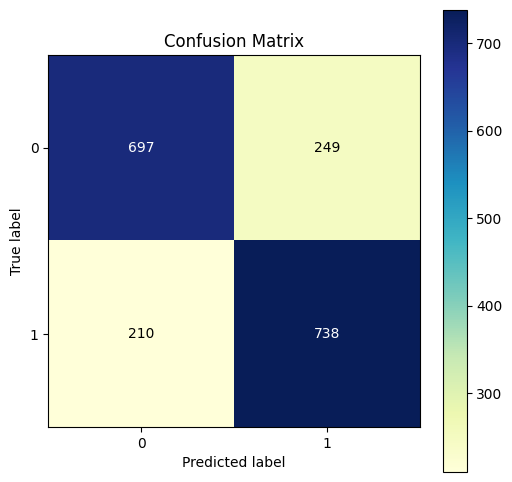

In [38]:
#SVM model
svm = SVC()
svm.fit(X_train, Y_train)
# Training set evaluation
svm_train = svm.predict(X_train)
svm_acc_train = accuracy_score(Y_train, svm_train)
# Test set evaluation
svm_test = svm.predict(X_test)
svm_acc_test = accuracy_score(Y_test, svm_test)
# Print accuracy scores
print("SVM Accuracy (Train):", svm_acc_train)
print("SVM Accuracy (Test):", svm_acc_test)
# Precision, Recall, F-measure
svm_perc = precision_score(Y_test, svm_test)
svm_rec = recall_score(Y_test, svm_test)
svm_f1 = f1_score(Y_test, svm_test)
print('Precision: ', svm_perc)
print('Recall: ',  svm_rec)
print('F-measure: ', svm_f1)
# Confusion Matrix
skplt.metrics.plot_confusion_matrix(Y_test, svm_test, figsize=(6, 6),
                                    cmap='YlGnBu')

Random Forest Accuracy (Train): 1.0
Random Forest Accuracy (Test): 0.9889123548046462
Precision:  0.978328173374613
Recall:  1.0
F-measure:  0.9890453834115805


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

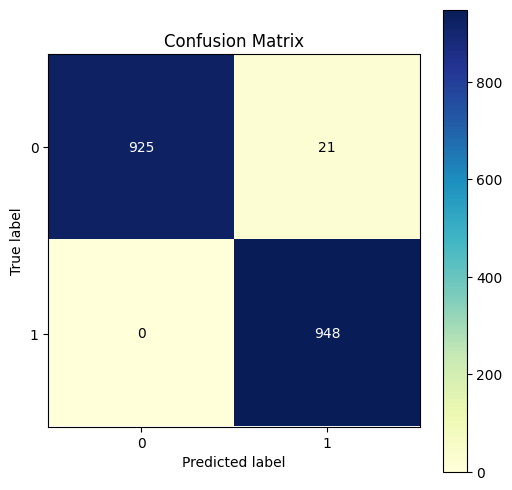

In [39]:
# Random Forest Classifier Model
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
# Training set evaluation
rf_train = rf.predict(X_train)
rf_acc_train = accuracy_score(Y_train, rf_train)
# Test set evaluation
rf_test = rf.predict(X_test)
rf_acc_test = accuracy_score(Y_test, rf_test)
# Print accuracy scores
print("Random Forest Accuracy (Train):", rf_acc_train)
print("Random Forest Accuracy (Test):", rf_acc_test)
# Precision, Recall, F-measure
rf_perc = precision_score(Y_test, rf_test)
rf_rec = recall_score(Y_test, rf_test)
rf_f1 = f1_score(Y_test, rf_test)
print('Precision: ', rf_perc)
print('Recall: ', rf_rec)
print('F-measure: ', rf_f1)
# Confusion Matrix
skplt.metrics.plot_confusion_matrix(Y_test, rf_test, figsize=(6, 6),
                                    cmap='YlGnBu')

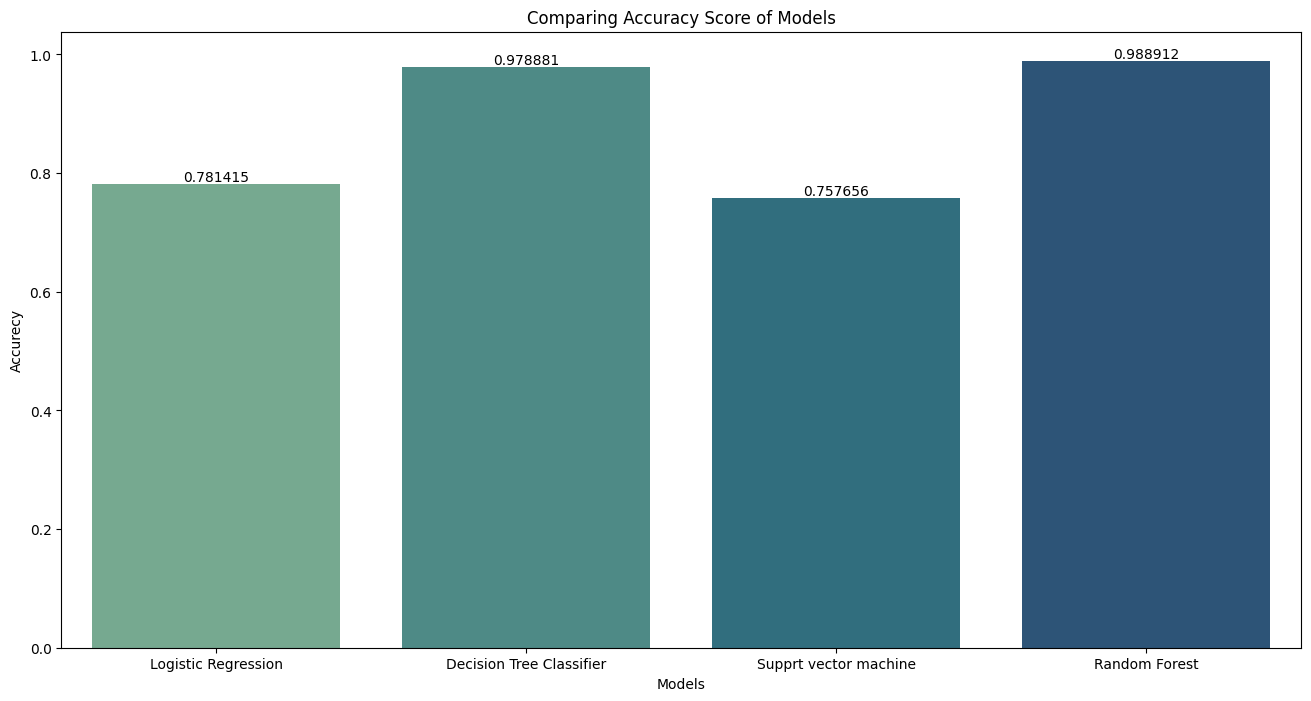

In [40]:
plt.figure(figsize = (16, 8))
models = ['Logistic Regression', 'Decision Tree ','Supprt vector machine','Random Forest']
auc = [lr_acc_test, dt_acc_test,svm_acc_test,rf_acc_test]
ax = sns.barplot(x = models, y = auc, palette='crest')
ax.bar_label(ax.containers[0])
plt.title('Comparing Accuracy Score of Models')
plt.xlabel('Models')
plt.ylabel('Accurecy');